In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
config_file = "experiment_results_16_concepts.json"
with open(config_file) as json_file:
    results = json.load(json_file)

experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
headers = ["Method", "Loss", "Label Accuracy", "Label Loss", "Concept Accuracy", "Concept Loss", "Latent Loss"]
expr_results = []
for expr in experiments:
    expr_result = [expr]
    expr_result.extend(list(results[expr]['results'].values()))
    expr_results.append(expr_result)

In [3]:
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Loss,Label Accuracy,Label Loss,Concept Accuracy,Concept Loss,Latent Loss
0,baseNN,1.376339,0.788903,1.376339,0.537387,0.000000,0.000000
1,softCBM,0.002225,0.713161,0.000928,0.927194,0.001297,0.000000
2,latentCBM,0.000061,0.732516,0.000031,0.983210,0.000030,0.000000
3,leakageLoss,0.009492,0.678065,0.002938,0.893419,0.003277,0.003277
4,leakageDelay,0.007521,0.681290,0.002895,0.906193,0.002406,0.002220
5,sequentialCBM,0.265294,0.443226,0.073624,0.976984,0.000192,0.000000
6,sequentialLeakage,0.011638,0.742968,0.000005,0.975435,0.000216,0.011416


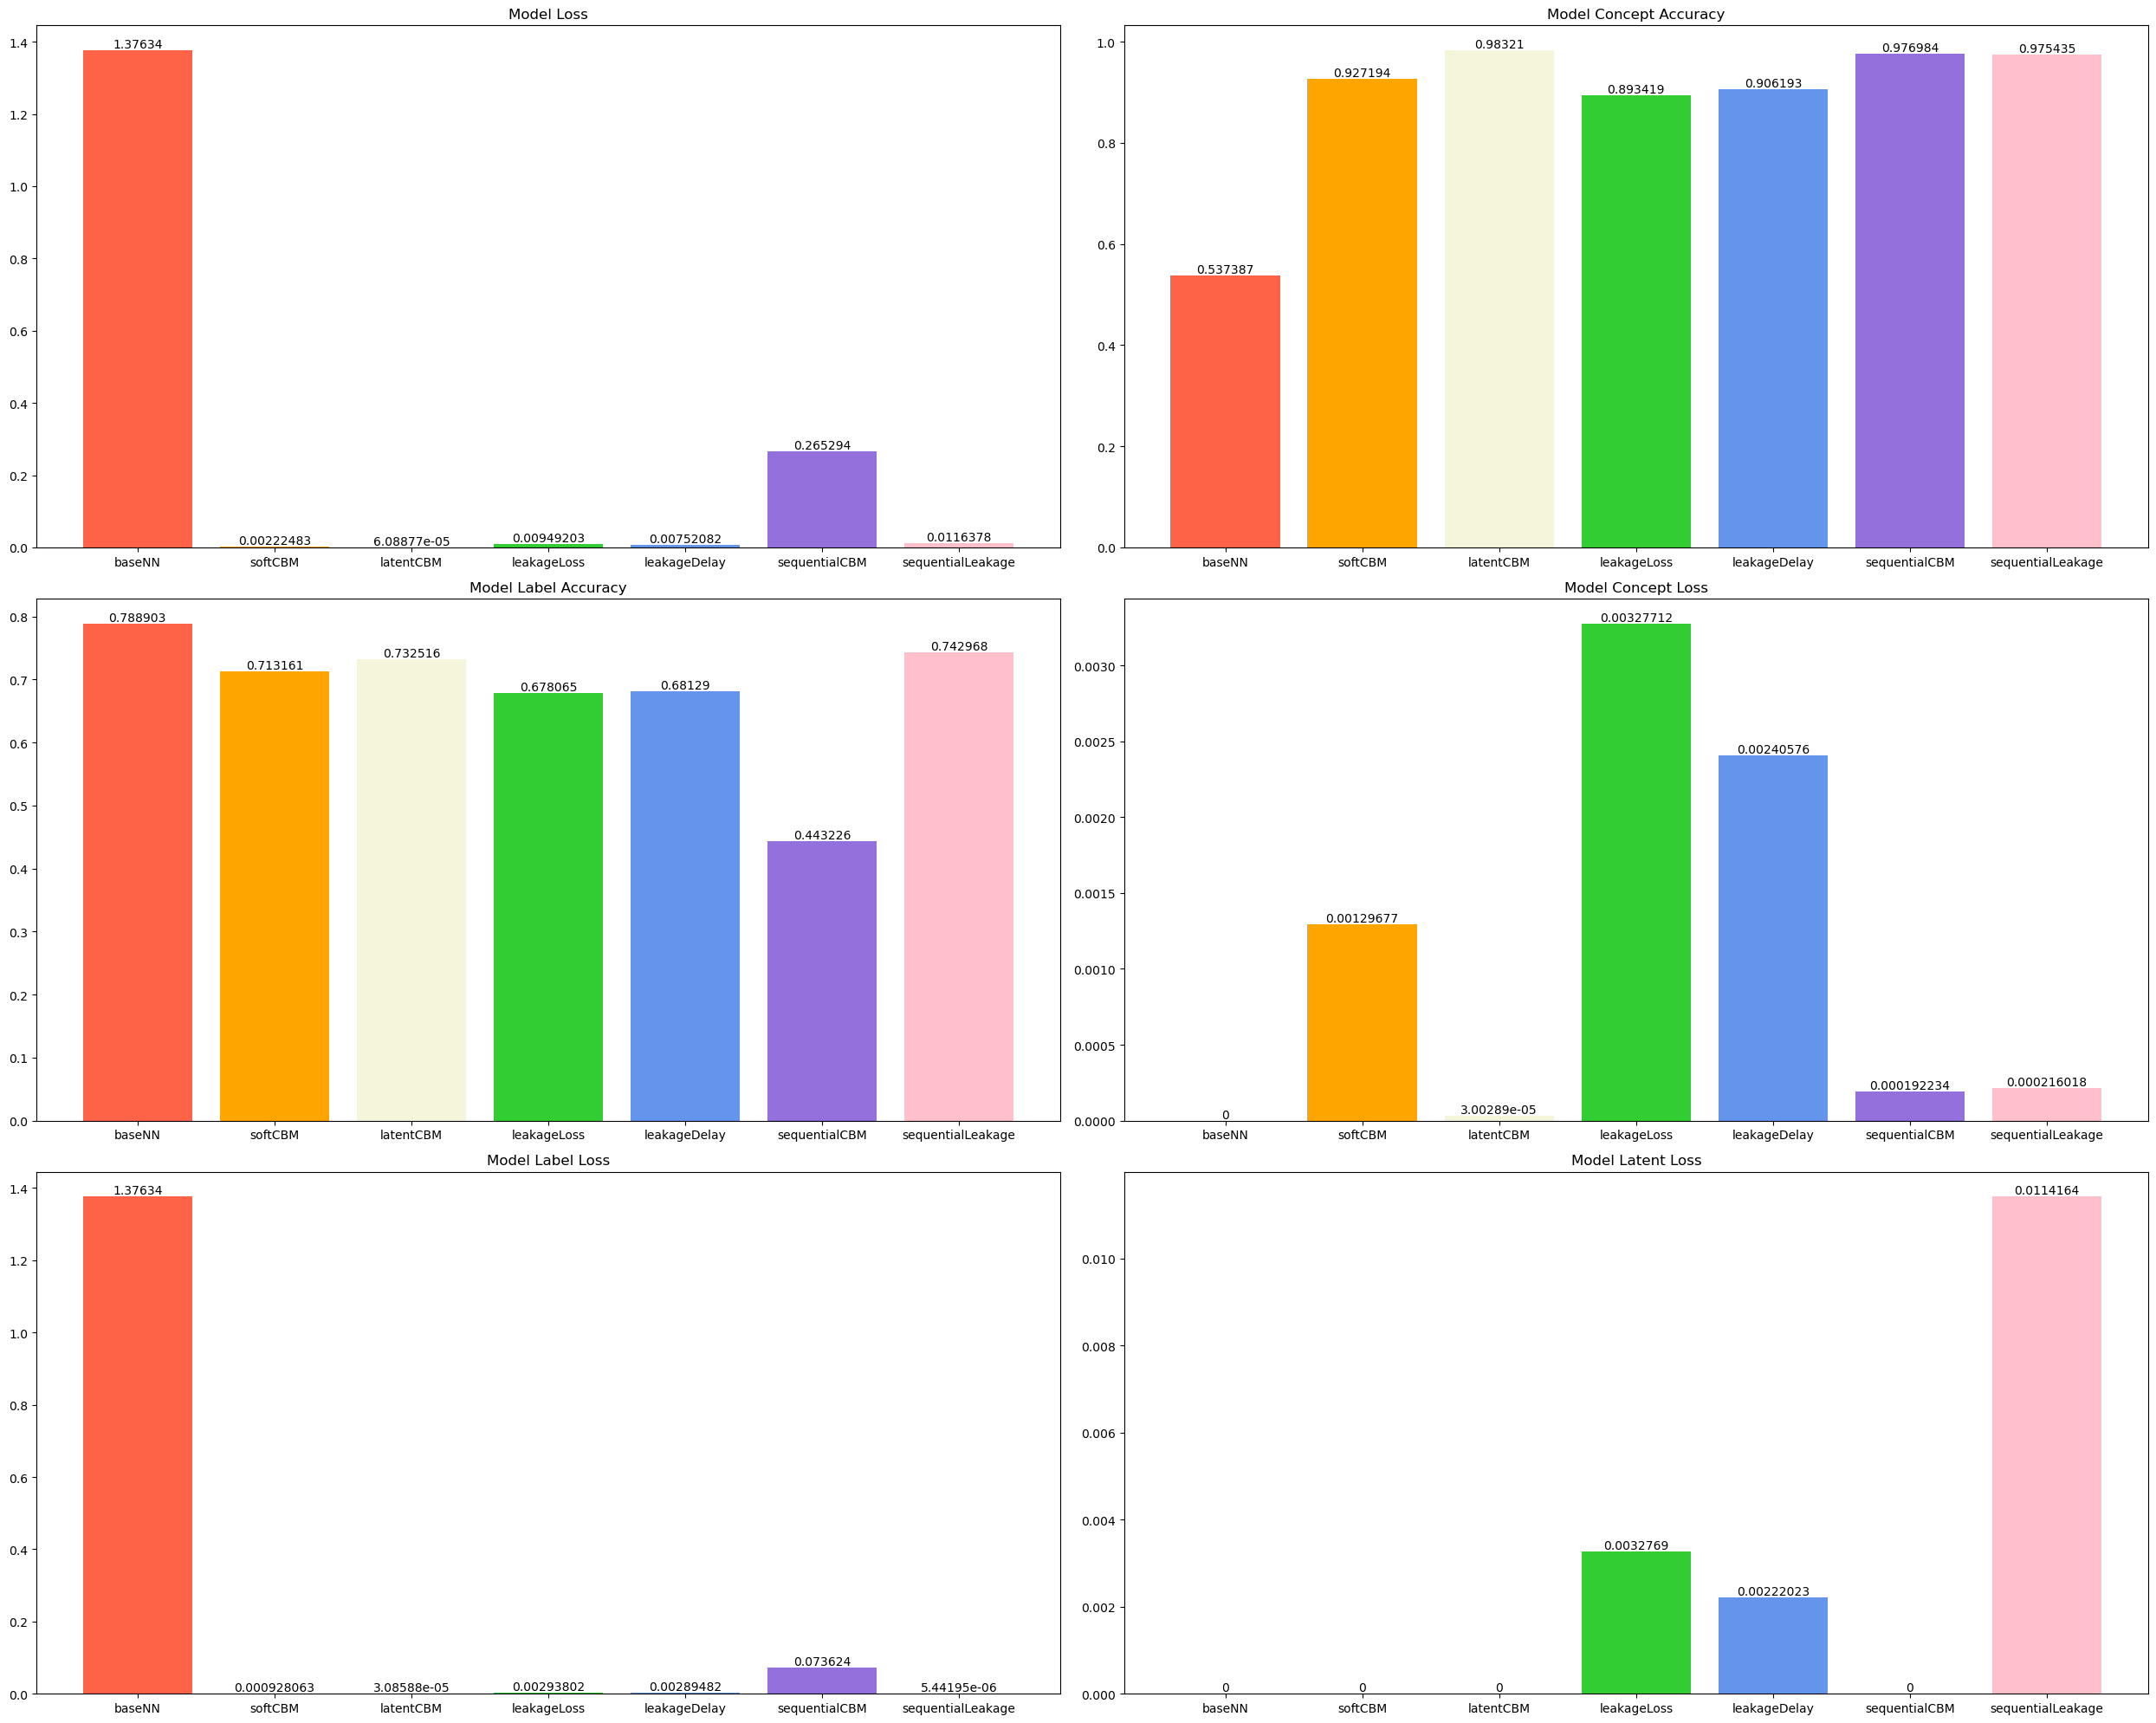

In [4]:
# plt.figure(figsize=(10,30))
fig, axs = plt.subplots(3, 2, figsize=(25, 20))
colors = ['tomato', 'orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink']
for i in range(1, len(headers)):
    bar = axs[(i-1)%3, (i-1)//3].bar(experiments, df[headers[i]], color=colors)
    axs[(i-1)%3, (i-1)//3].set_title(f"Model {headers[i]}")
    axs[(i-1)%3, (i-1)//3].bar_label(bar, label_type='edge')
plt.tight_layout()
plt.show()
